In [1]:
import os
import omdb
import csv
import pandas as pd
import pickle
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import plotly.plotly as py
from plotly.graph_objs import *
#from networkx_viewer import Viewer

In [2]:
df = pd.read_pickle("/Users/kristenkozmary/Desktop/databasedump.pickle")

In [3]:
df = df[df['language'] == 'English']

In [4]:
del df['awards']
del df['country']
del df['director']
del df['genre']
del df['imdb_rating']
del df['imdb_votes']
del df['writer']
del df['metascore']
del df['plot']
del df['production']
del df['rated']
del df['released']
del df['year']
del df['title_director']

In [5]:
df.describe()

,actors,box_office,language,title
count,9330,9173,9330,9330
unique,9109,1671,1,9315
top,N/A,N/A,English,Seal Team Six: The Raid on Osama Bin Laden
freq,89,7448,9330,2


In [6]:
#process dataframe into network
allActors = []
biGraph = nx.Graph()
actorSet = 0
movieSet = 1
count = 0

for index, row in df.iterrows():
    movie = row['title']
    biGraph.add_nodes_from([movie], bipartite=movieSet)
    actors = row['actors']
    if isinstance(actors, str):
        actors = actors.split(', ')
        #print(actors)
        for actor in actors:
            if not any(actor == name for name in allActors): # if actor is not in allActors already:
                allActors.append(actor)
                biGraph.add_nodes_from([actor], bipartite=actorSet)
                biGraph.add_edge(movie, actor, weight=1)
            else:
                #currWeight = biGraph[movie][actor]['weight']
                #print(actor)
                biGraph.add_edge(movie, actor, weight=1)
    count = count + 1
    #if count > 200:
        #break

In [137]:
movieNodes = set(n for n, d in biGraph.nodes(data=True) if d['bipartite']==movieSet)
actorNodes = set(n for n, d in biGraph.nodes(data=True) if d['bipartite']==actorSet)
print(len(movieNodes))
print(len(actorNodes))

9308
16320


In [7]:
top_nodes = set(n for n, d in biGraph.nodes(data=True) if d['bipartite']==actorSet)
bottom_nodes = set(biGraph) - top_nodes

In [8]:
G = bipartite.projected_graph(biGraph, top_nodes)

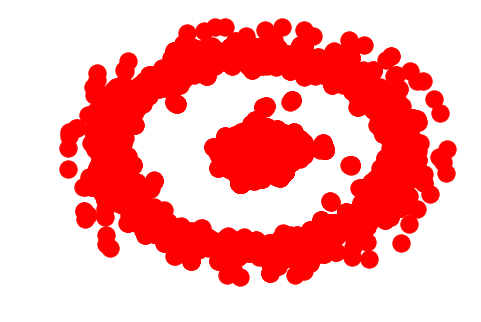

In [9]:
nx.draw(G)
plt.show()

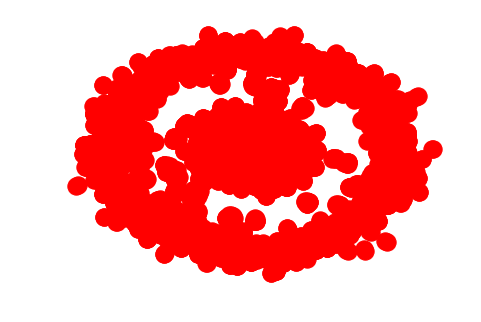

In [10]:
nx.draw(biGraph)
plt.show()

In [31]:
#bipartite.degree_centrality(biGraph, top_nodes)

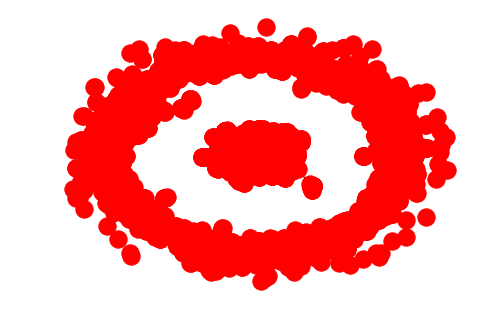

In [138]:
C = bipartite.projected_graph(biGraph, actorNodes, multigraph=False)
nx.draw(C)
plt.show()

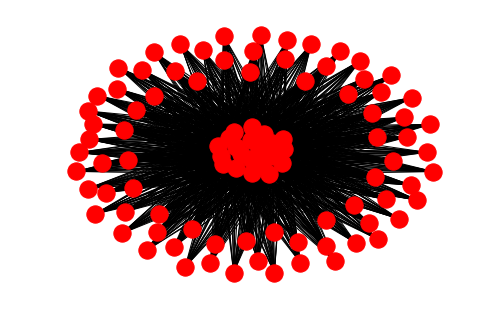

In [76]:
BiG = bipartite.complete_bipartite_graph(actorNodes,movieNodes)
nx.draw(BiG)
plt.show()

In [64]:
pos = nx.get_node_attributes(C,'pos')

In [65]:
nx.is_connected(biGraph)

False

In [30]:
pos = {}

# Update position for node from each group
pos.update((node, (1, index)) for index, node in enumerate(top_nodes))
pos.update((node, (2, index)) for index, node in enumerate(bottom_nodes))

#nx.draw(biGraph, pos=pos)
#plt.show()

In [29]:
#graph.nodes()

In [28]:
#graph.edges()

In [108]:
bipartite.sets(biGraph)

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

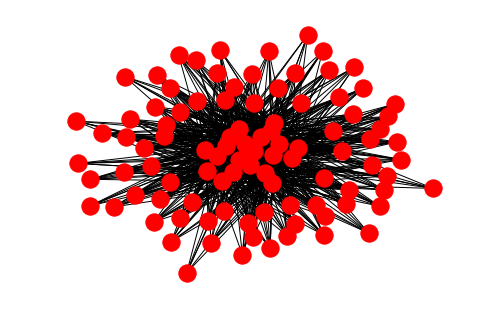

In [110]:
#this is connecting every node
LMN = len(movieNodes)
LAN = len(actorNodes)
bp = bipartite.random_graph(LAN,LMN,.5)
nx.draw(bp)
plt.show()

In [161]:
deg = nx.degree(C)
pos=nx.spring_layout(C)

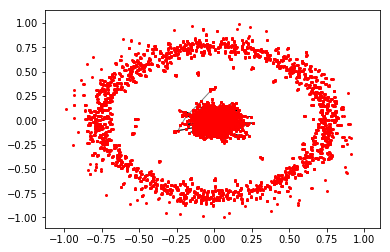

In [165]:
nx.draw_networkx_nodes(C,pos,node_size=4)
nx.draw_networkx_edges(C,pos,alpha=0.5)
plt.savefig("Cplot.png")
plt.show()

In [27]:
#trying to delete all nodes that have degree 3 or less, 
#will let us focus on the connected part of the graph
degC = nx.degree(C)

for n in degC:
    #print(n[1])
    if (n[1] == 3):
        #print(n[0])
        for node in allActors:
            if (node == n[0]):
                #print(node)
                #delete node from allActors
                #del node

SyntaxError: unexpected EOF while parsing (<ipython-input-27-7937bc8a537a>, line 13)

In [204]:
print(len(allActors))

16325


In [22]:
def avg_neigh_degree(biGraph):
 data = {}
 for n in biGraph.nodes():
     if biGraph.degree(n):
        data[n] = float(sum(biGraph.degree(i) for i in biGraph[n]))/biGraph.degree(n)
     return data

In [23]:
print(avg_neigh_degree(biGraph))

{'Baadasssss Cinema': 4.75}
